Grade=97/100

# Introduction
The purpose of this lab is to develop skills in how to calibrate a science image using biases, and flats. We need to do this in order to make our "pretty pictures" that people love to look at so much. 

# Procedures
In this lab we use biases and flats that have ben taken from kitt peak to calibrate an image. We do this first by importing the images, and using histograms to determine where to "zoom" in on them. 

I then wrote a for loop that finds pixels which are not on the plane I want, and corrects them in order to get rid of the "donut" shape that previously distorted my image and data.

In part 2 of the lab this calibrated image was uploaded to the image editing software known as aladin. I then followed the steps and was able to find where in the sky my image is, from that I was able to discern what astronomical objects I was looking at and compare it to the professionally calibrated image.

In [15]:
#Importing libaries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import Image
%matplotlib inline

In [2]:
root = '/Users/beechamb/desktop/lsa-ast361/work/beechamb/lab5/data/'

#Importing the files
zero1 = np.float64(fits.getdata(root + 'kp288925.fits.fz'))
zero2 = np.float64(fits.getdata(root + 'kp288927.fits.fz'))
zero3 = np.float64(fits.getdata(root + 'kp288929.fits.fz'))
zero4 = np.float64(fits.getdata(root + 'kp288931.fits.fz'))
zero5 = np.float64(fits.getdata(root + 'kp288933.fits.fz'))
zero6 = np.float64(fits.getdata(root + 'kp288935.fits.fz'))
zero7 = np.float64(fits.getdata(root + 'kp288936.fits.fz'))
zero8 = np.float64(fits.getdata(root + 'kp288938.fits.fz'))
zero9 = np.float64(fits.getdata(root + 'kp288940.fits.fz'))
zero10 = np.float64(fits.getdata(root + 'kp288943.fits.fz'))
flat1 = np.float64(fits.getdata(root + 'kp288948.fits.fz'))
flat2 = np.float64(fits.getdata(root + 'kp288950.fits.fz'))
flat3 = np.float64(fits.getdata(root + 'kp288952.fits.fz'))
flat4 = np.float64(fits.getdata(root + 'kp288953.fits.fz'))
flat5 = np.float64(fits.getdata(root + 'kp288954.fits.fz'))
flat6 = np.float64(fits.getdata(root + 'kp288956.fits.fz'))
flat7 = np.float64(fits.getdata(root + 'kp288957.fits.fz'))
flat8 = np.float64(fits.getdata(root + 'kp288959.fits.fz'))
flat9 = np.float64(fits.getdata(root + 'kp288961.fits.fz'))
flat10 = np.float64(fits.getdata(root + 'kp288963.fits.fz'))
file2578 = np.float64(fits.getdata(root + 'tu941164.fits.fz'))#notbias
raw = np.float64(fits.getdata(root + 'kp289010.fits.fz'))
science = np.float64(fits.getdata(root + 'tu941456.fits.fz'))


[[ 2477.4  2477.   2476.  ...,  2487.7  2490.2  2343.5]
 [ 2476.1  2477.9  2475.9 ...,  2483.6  2489.   2335.3]
 [ 2477.8  2477.   2477.1 ...,  2485.3  2488.   2335.7]
 ..., 
 [ 2476.4  2476.9  2476.9 ...,  2483.9  2487.5  2337.6]
 [ 2477.6  2476.3  2477.  ...,  2485.6  2488.2  2336.1]
 [ 2477.9  2476.9  2477.5 ...,  2484.2  2488.2  2336.6]]
2477.3954621
6.73803421344


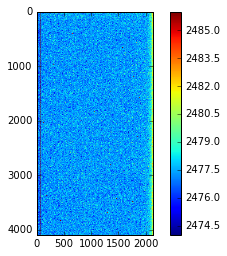

In [3]:
#MasterBias-a&b
zeroaverage = np.float64(((zero1 + zero2 + zero3 + zero4 + zero5 + zero6 + zero7 + zero8 + zero9 + zero10)/10))
flattenedwh = zeroaverage.flatten()
plt.hist(flattenedwh)

print zeroaverage

plt.imshow(zeroaverage, vmin = 2474, vmax = 2486)
plt.colorbar()

zeromean = (np.mean(zeroaverage))
zerostd = np.std(zeroaverage)
print zeromean
print zerostd



In [4]:
plt.hist(flattenedwh, bins = 5000)
plt.xlim(2474,2486)

(2474, 2486)

In [5]:
#MasterFlat-c&d
#Here I made a "masterflat" by subtracting the average of all zero images,
#and dividing by ten. It is really an "averageflat".
masterflat = (((flat1 - zeroaverage) + (flat2 - zeroaverage) + (flat3 - zeroaverage) + (flat4 - zeroaverage)
             + (flat5 - zeroaverage) + (flat6 - zeroaverage) + (flat7 - zeroaverage) + (flat8 - zeroaverage)
             + (flat9 - zeroaverage) + (flat10 - zeroaverage))/10)

meanflat = np.mean(masterflat)
stdflat = np.std(masterflat)
print meanflat
print stdflat


7828.93664474
1658.59258527


(7000, 8700)

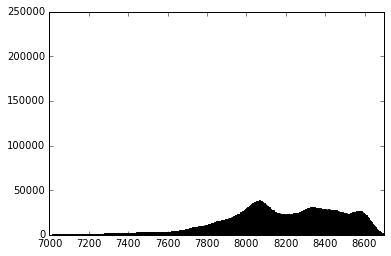

In [6]:
flatflat = masterflat.flatten()
plt.hist(flatflat, bins = 5000)
plt.xlim(7000,8700)

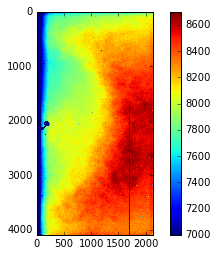

In [7]:
plt.imshow(masterflat, vmin = 7000, vmax = 8700)
plt.colorbar()
#The image with the donut.

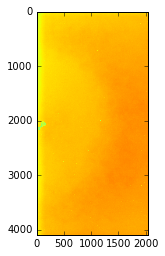

In [8]:
#NOAO's MASTAHFLAT
plt.imshow(file2578)

In [9]:
#Their Science
plt.imshow(science)

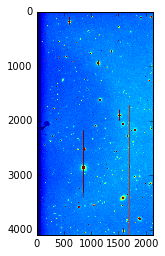

In [10]:
#Their Raw
plt.imshow(raw,vmin=4000,vmax=6000)

[[  7.39053113e-01   7.37047732e-01   7.36357983e-01 ...,   2.68235662e-04
    6.38656337e-04   3.32101295e-04]
 [  8.38402493e-01   8.45108384e-01   8.40829387e-01 ...,   1.78823774e-04
   -2.93781915e-04   3.83193802e-05]
 [  8.59529245e-01   8.57702687e-01   8.64766227e-01 ...,   1.14958141e-04
   -2.17143155e-04   1.27731267e-04]
 ..., 
 [  9.94272959e-01   9.97210778e-01   1.00009750e+00 ...,   1.02185014e-04
   -2.17143155e-04  -3.57647549e-04]
 [  9.75700832e-01   9.71945533e-01   9.74857806e-01 ...,  -5.10925070e-05
   -1.02185014e-04  -2.04370028e-04]
 [  8.94936352e-01   8.91398196e-01   8.96801228e-01 ...,  -1.66050648e-04
    2.55462535e-05  -1.91596901e-04]]


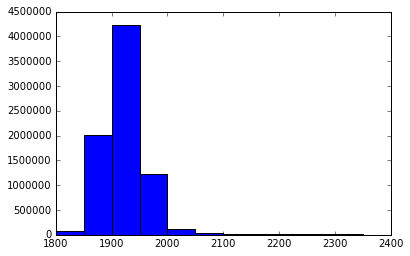

In [11]:
#Calibrating...
newflat = masterflat[0:,200:]
flatcal = newflat/(meanflat)

idx = []
idx = np.where(flatcal ==0)

for i in idx:
    flatcal[idx[0],idx[1]]=0.1
    
mycal = (raw[0:,200:]-zeroaverage[0:,200:])/flatcal
plt.hist(mycal.flatten(),bins = 1000, range = (0,50000))
plt.xlim(1800,2400)
print(flatcal)
plt.show()

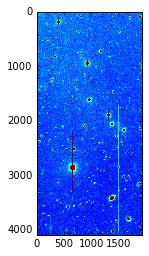

In [12]:
plt.imshow(mycal, vmin = 1800, vmax = 2400)
#My calibrated image after getting rid of the donut shape.

In [14]:
fits.writeto('ahh.fits', mycal)

# Part 2

# 1b
The loaded objects do not lie on top of the astronomical objects in the image. This is because it doesn't know where in the sky my iamge is yet. To fix this, I would look at their calibrated image from kitt peak in order to find the right ascension and declination that correspond with my calibrated image.

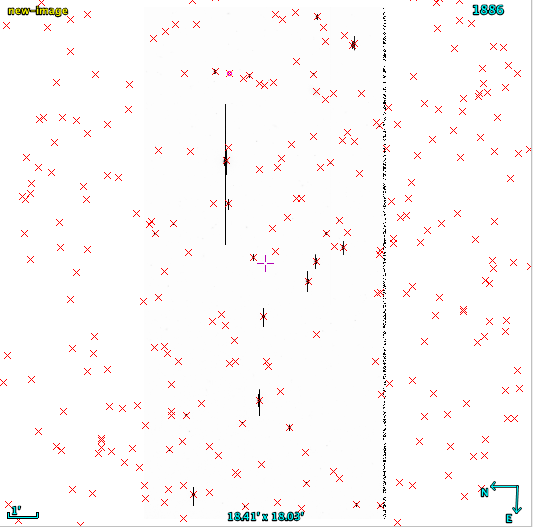

In [19]:
#Part 2c
Image(filename=root + 'blah.png')

# 2d
A WCS is a "World Coordinate System" it is important for astronomy to pinpoint which stars/constellations are where in the sky.

NAXIS: Number of pixels along an axis.
CRPIX: Location of the reference point along an axis.
EQUINOX: Equinox in years for the celestial coordinate system in which the positions are expressed.
CRVAL: Value of the world coordinate at the reference point for an axis in degrees.
CTYPE: Name of the coordinate represented in an axis.
CDN_M: Identifier of detector in FPA.

# 2e
After looking at both coordinate systems I determined that they were about
eight arcseconds apart.

# Part 3
3b)Do the 2MASS objects lie on top of real astronomical sources?
Yes, they do! The 2MASS overlay now lines up quite well with my calibrated image.

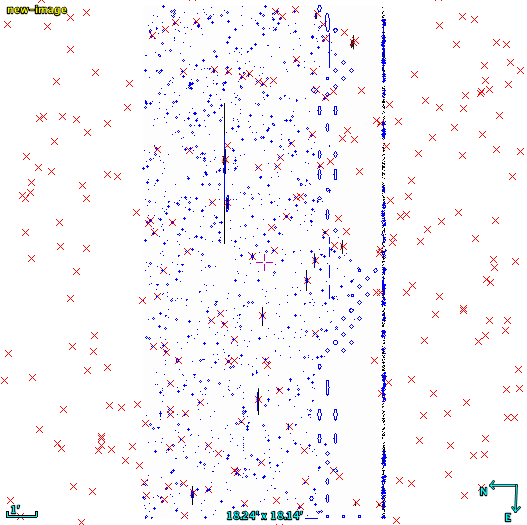

In [20]:
#3b continued...where the astronomical sources are on the new image!!!!
Image(filename=root + 'newcal.png')

# 3c
MAG_ISO: Magnitude
ALPHA_J2000: right ascension
DELTA_J2000: declination 

The data types have changed by name, their order has also changed. I believe the magnitudes in my catalog are correct because if I click on one from the 2MASS and one from mine their RA and DEC are virtually the same.

# 4b
It has all the attributes/data from both catalogs.
Columns that are positions and magnitudes: ALPHA_J2000, DELTA_J2000, MAG_ISO,MAG_BEST, MAG_APER, MAG_AUTO.
The magnitudes and positions are indeed similar.
# 4b
I think we should use MAG_BEST to compare the SDSS to my data, because it is the best fit magnitude.
Looks like it could be a straight line around: (-16,-15)

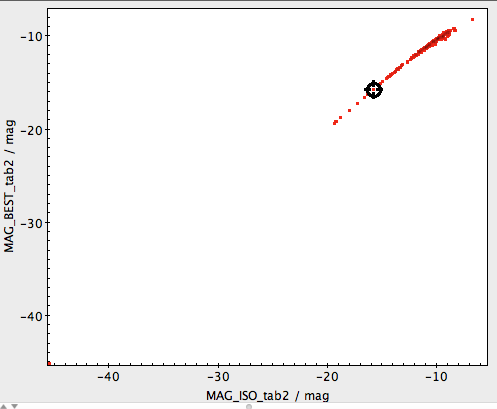

In [21]:
Image(filename=root + 'str8.png')

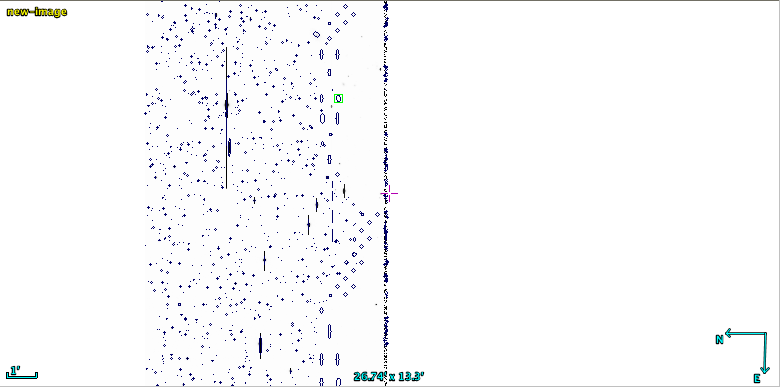

In [22]:
Image(filename=root + 'newestcatalog.png')

# 4e
This time it |x-y| is definitely zero!!! (-18,-18)!!!

# Results and Discussion
From this lab I learned how to calibrate images. It seems that with enough practice, perhaps someday we will be able to calibrate images just as well as real scientists. 